In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [ ]:
# 그래프에서 선의 종류
# グラフの線の種類
linestyles = ['-', '--', ':']

def E( X, g= lambda x: x):
    x_set, f = X
    return np.sum ([g(x_k) * f(x_k) for x_k in x_set ])

def V( X, g=lambda x: x):
    x_set, f = X
    mean = E( X, g)
    return np.sum ([ (g(x_k) -mean) **2 * f(x_k) for x_k in x_set])

def check_prob (X):
    x_set, f=X
    prob = np.array ([ f(x_k) for x_k in x_set])
    assert np.all (prob >=0), '마이너스 확률'
    prob_sum = np.round (np.sum (prob),6)
    assert prob_sum == 1, f'확률의 합{prob_sum}'
    print ( f'expected value {E(X):.4}')
    print ( f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


In [ ]:
# 기하분포 (geometric distribution)
#베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
# 확률변수가 취할 수 있는 값은 1이상 정수 전체이지만 구현의 편의상 29이하 정수로만..

def Ge( p ):
    x_set =np.arange( 1, 30 )
    def f(x):
        if x in x_set:
            return  p * (1-p) **( x-1)
        else:
            return 0
    return x_set, f

In [ ]:
 ## Ge(1/2) 을 따르는 확률변수 X 작성

p = 0.5
X = Ge(p)

expected value 2.0
variance 2.0


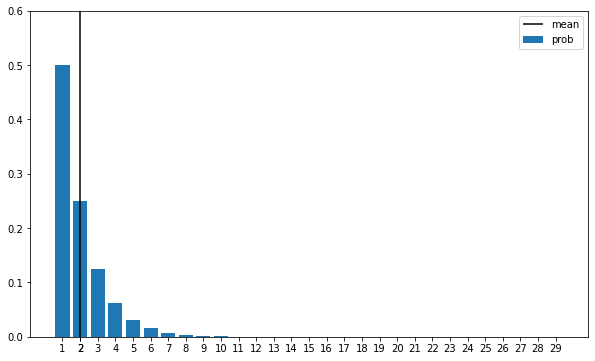

In [ ]:
check_prob(X)
plot_prob(X)

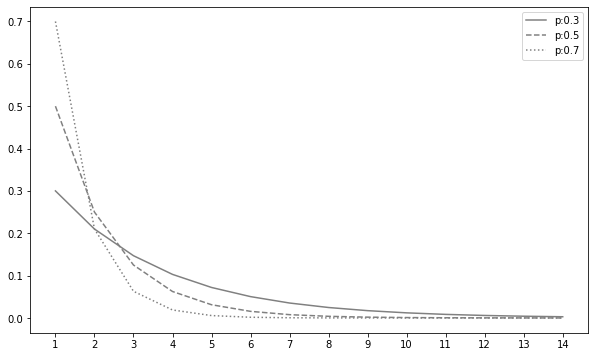

In [ ]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    x_set = np.arange (1,15)
    for p, ls in zip([0.3,0.5,0.7], linestyles):
        rv = stats.geom( p )
        ax.plot (x_set, rv.pmf (x_set),
                 label = f'p:{p}', ls=ls, color ='gray')
    ax.set_xticks( x_set )
    ax.legend()
    
    plt.show()